In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [32]:
import os
import json
import numpy as np


def aggregate_stats(stats_dir_path, save_path):
    stats = []
    for filename in os.listdir(stats_dir_path):
        stats_path = os.path.join(stats_dir_path, filename)

        stats_al = []
        with open(stats_path, 'r') as f:
            for line in f.readlines():
                stats_al.append(json.loads(line.rstrip().replace("'", '"'))['f1_entity_level'])

        stats.append(stats_al)

    stats = np.array(stats)
    np.save(save_path, stats)
    
    
def aggregate_exp(allstats_dir_path, exp_name):
    stats_dir_path = os.path.join(allstats_dir_path, f'{exp_name}_currstats')
    save_path = os.path.join(allstats_dir_path, 'finalstats', f'{exp_name}.npy')
    aggregate_stats(stats_dir_path, save_path)

In [33]:
allstats_dir_path = '../workdir/experiments/17_biobert'
aggregate_exp(allstats_dir_path, 'cad_i.i.d.')
aggregate_exp(allstats_dir_path, 'cad_MNLP')
aggregate_exp(allstats_dir_path, 'cad_MNLP-mod')

In [35]:
allstats_dir_path = '../workdir/experiments/17_biobert'
aggregate_exp(allstats_dir_path, 'diabetes_i.i.d.')
aggregate_exp(allstats_dir_path, 'diabetes_MNLP')
#aggregate_exp(allstats_dir_path, 'diabetes_MNLP-mod')

In [39]:
allstats_dir_path = '../workdir/experiments/17_biobert'
aggregate_exp(allstats_dir_path, 'hypertension_i.i.d.')
aggregate_exp(allstats_dir_path, 'hypertension_MNLP')

In [45]:
allstats_dir_path = '../workdir/experiments/17_biobert'
aggregate_exp(allstats_dir_path, 'genia_i.i.d.')
aggregate_exp(allstats_dir_path, 'genia_MNLP')

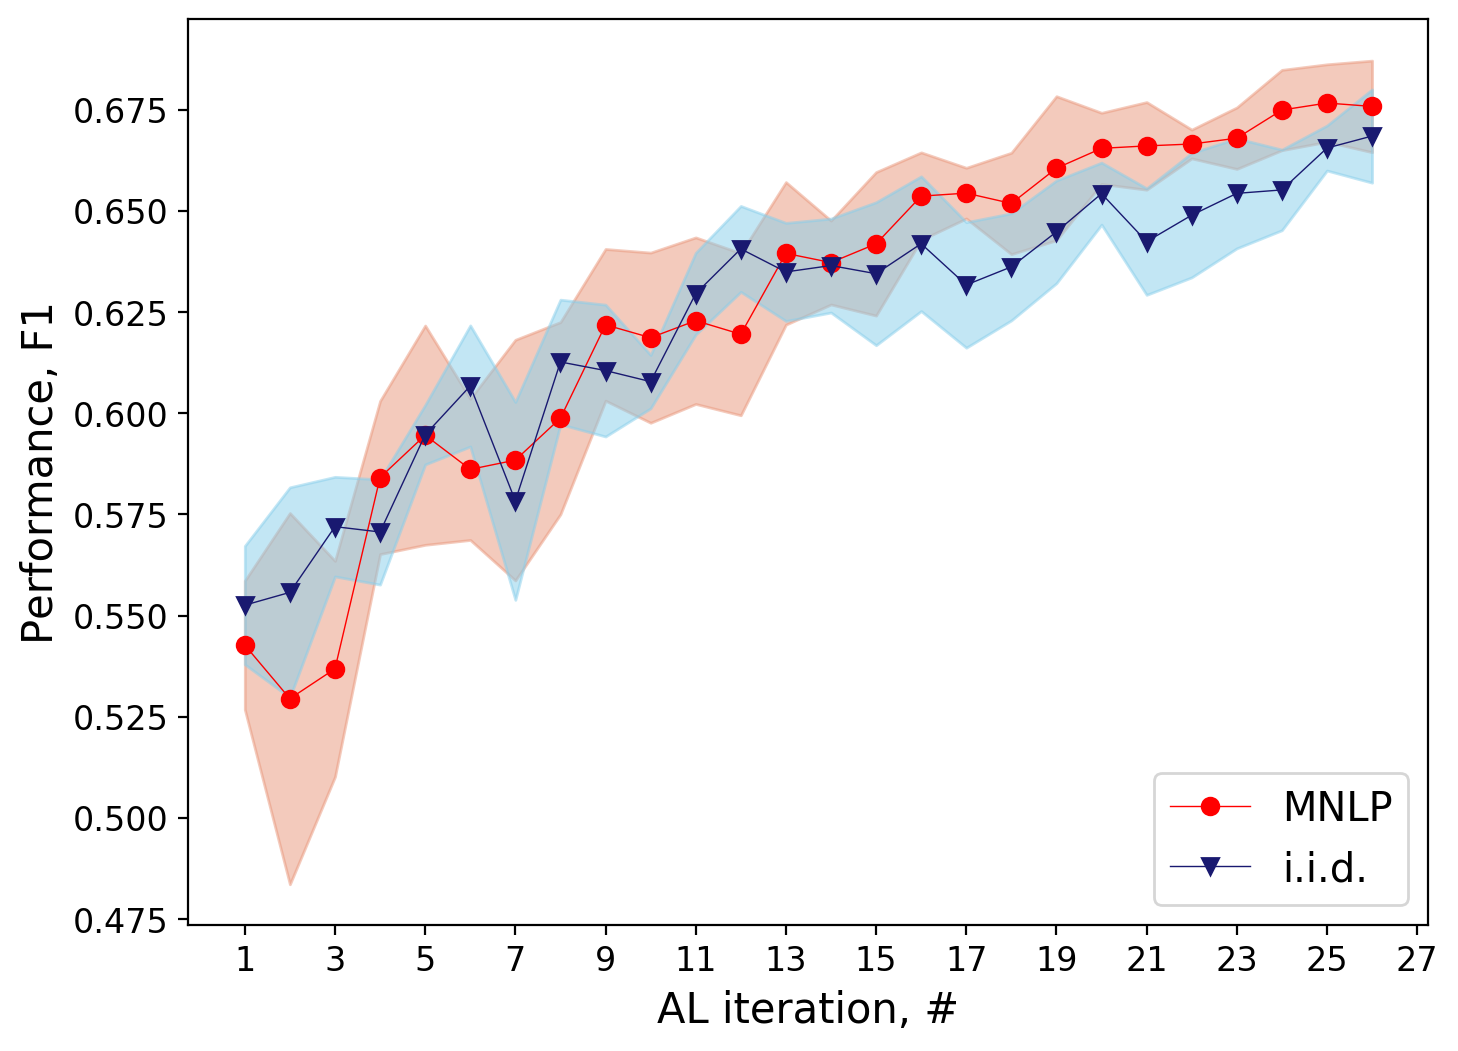

In [46]:
from generate_chart import create_chart

create_chart('../workdir/experiments/17_biobert/finalstats', 'genia', save_dir='../workdir/')

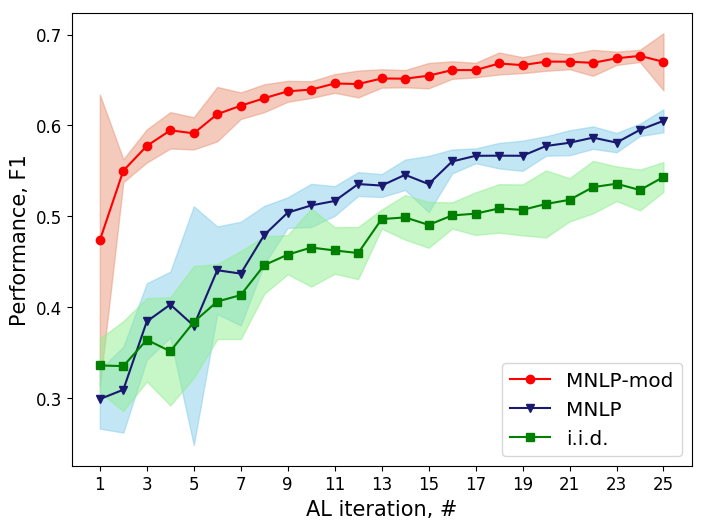

In [2]:
from generate_chart import create_chart
create_chart('../workdir/experiments/10/', 'genia', save_dir='../workdir/')

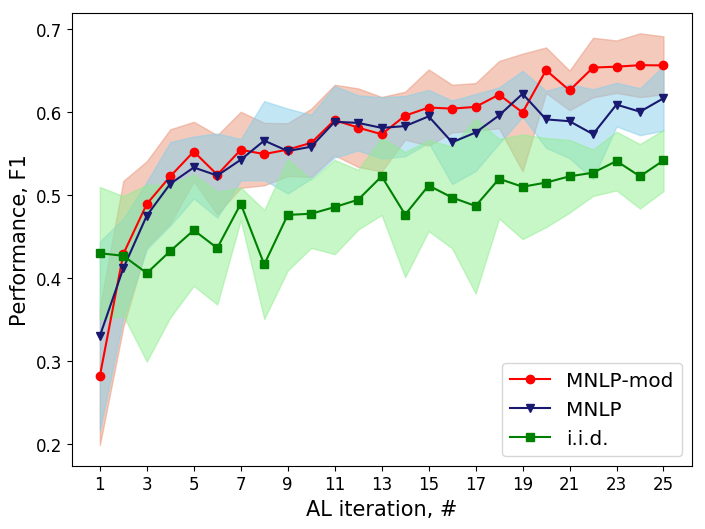

In [11]:
from generate_chart import create_chart
create_chart('../workdir/experiments/10/', 'diabetes', save_dir='../workdir/')

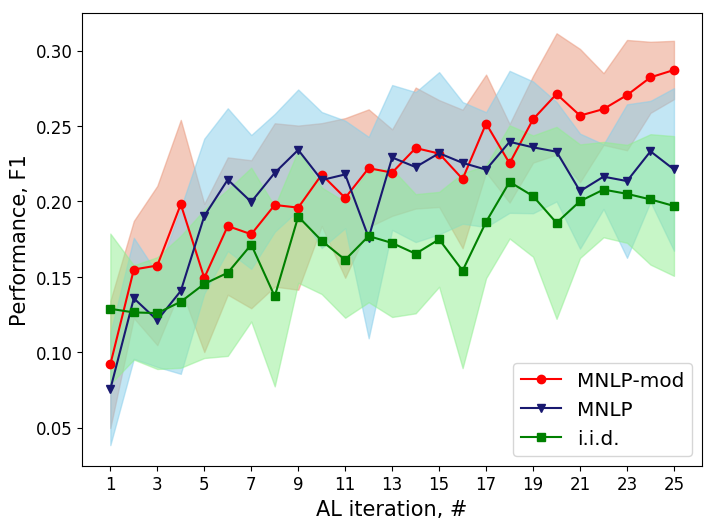

In [4]:
from generate_chart import create_chart
create_chart('../workdir/experiments/10/', 'cad', save_dir='../workdir/')

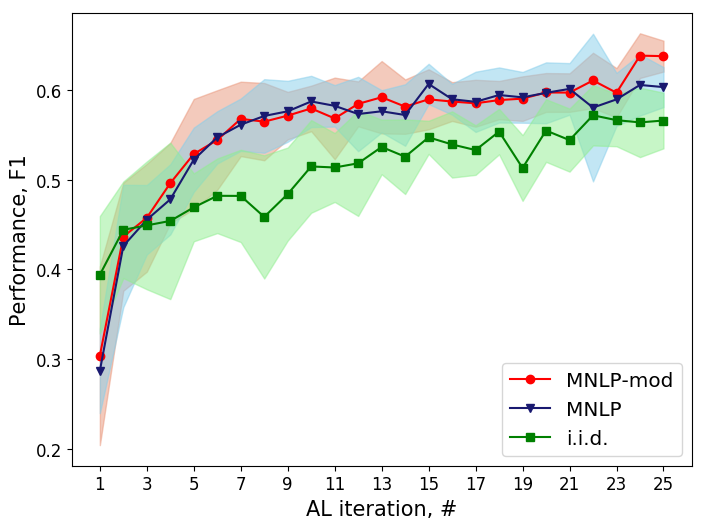

In [5]:
from generate_chart import create_chart
create_chart('../workdir/experiments/10/', 'hypertension', save_dir='../workdir/')

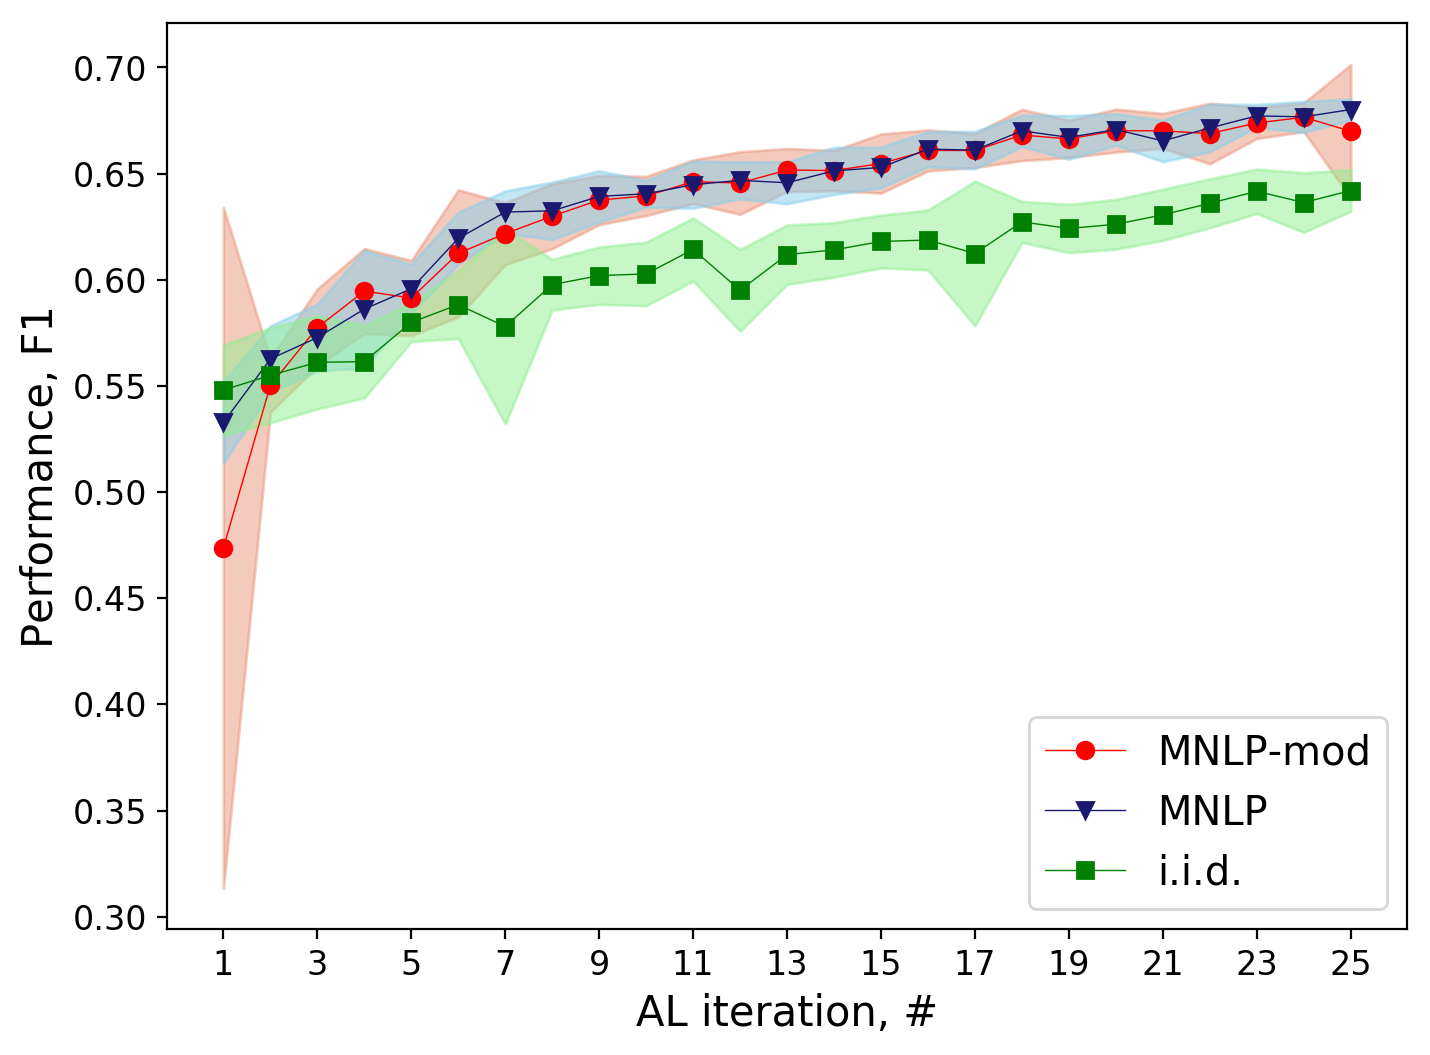

In [139]:
from generate_chart import create_chart
create_chart('../workdir/experiments/11_biobert/', 'genia', save_dir='../workdir/charts/bert')

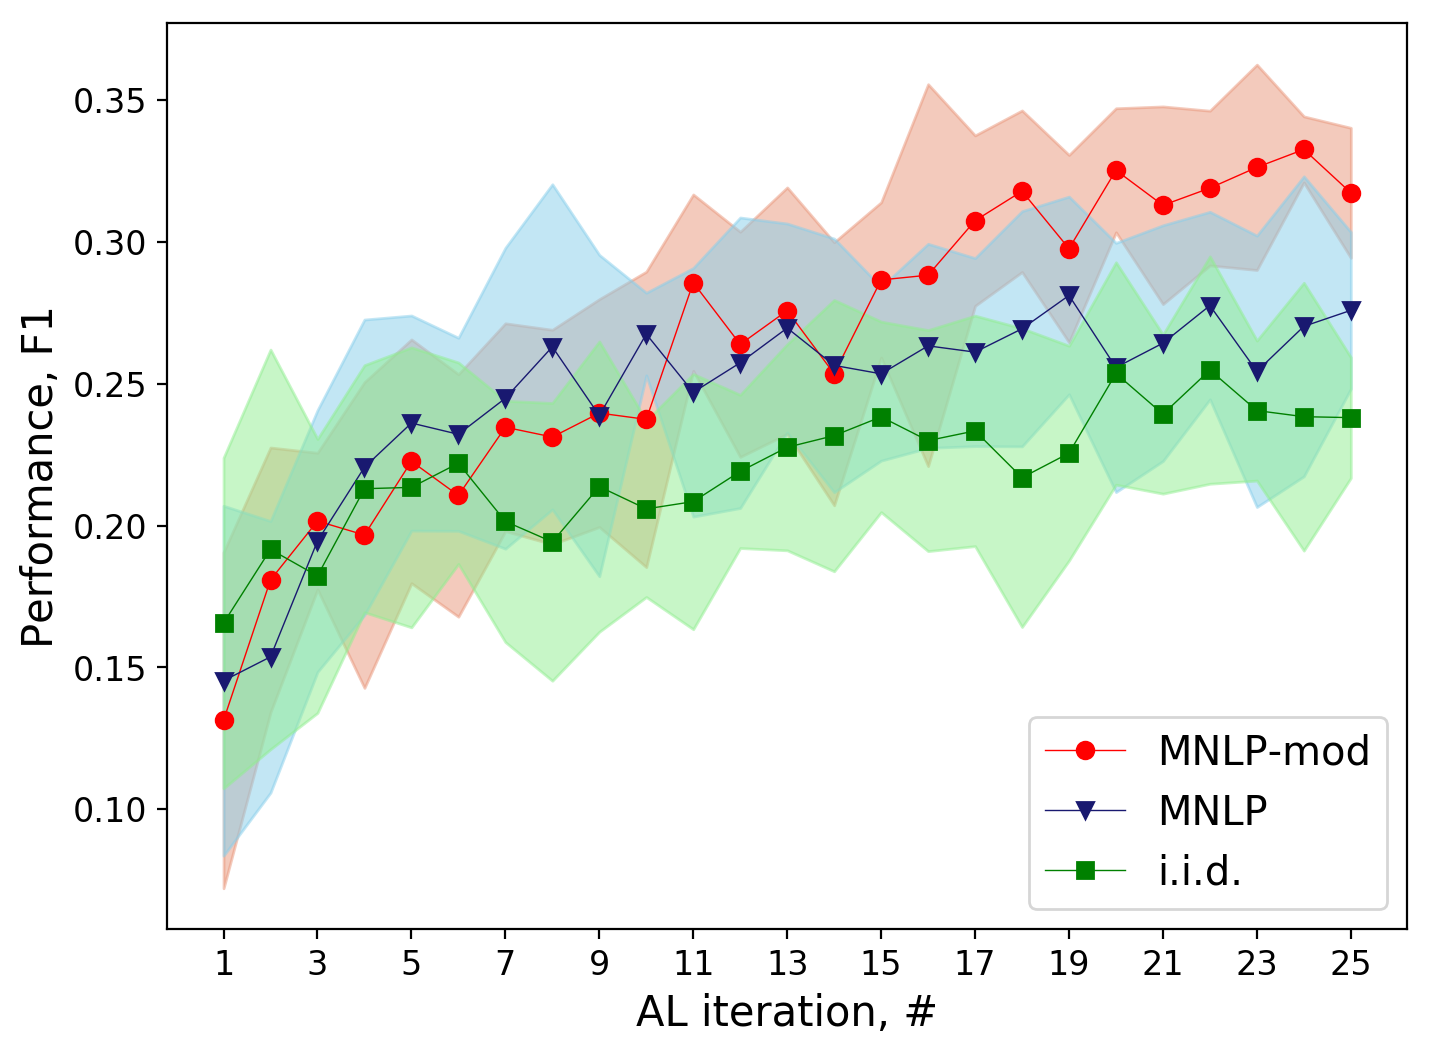

In [135]:
from generate_chart import create_chart
create_chart('../workdir/experiments/11_biobert/', 'cad', save_dir='../workdir/charts/bert')

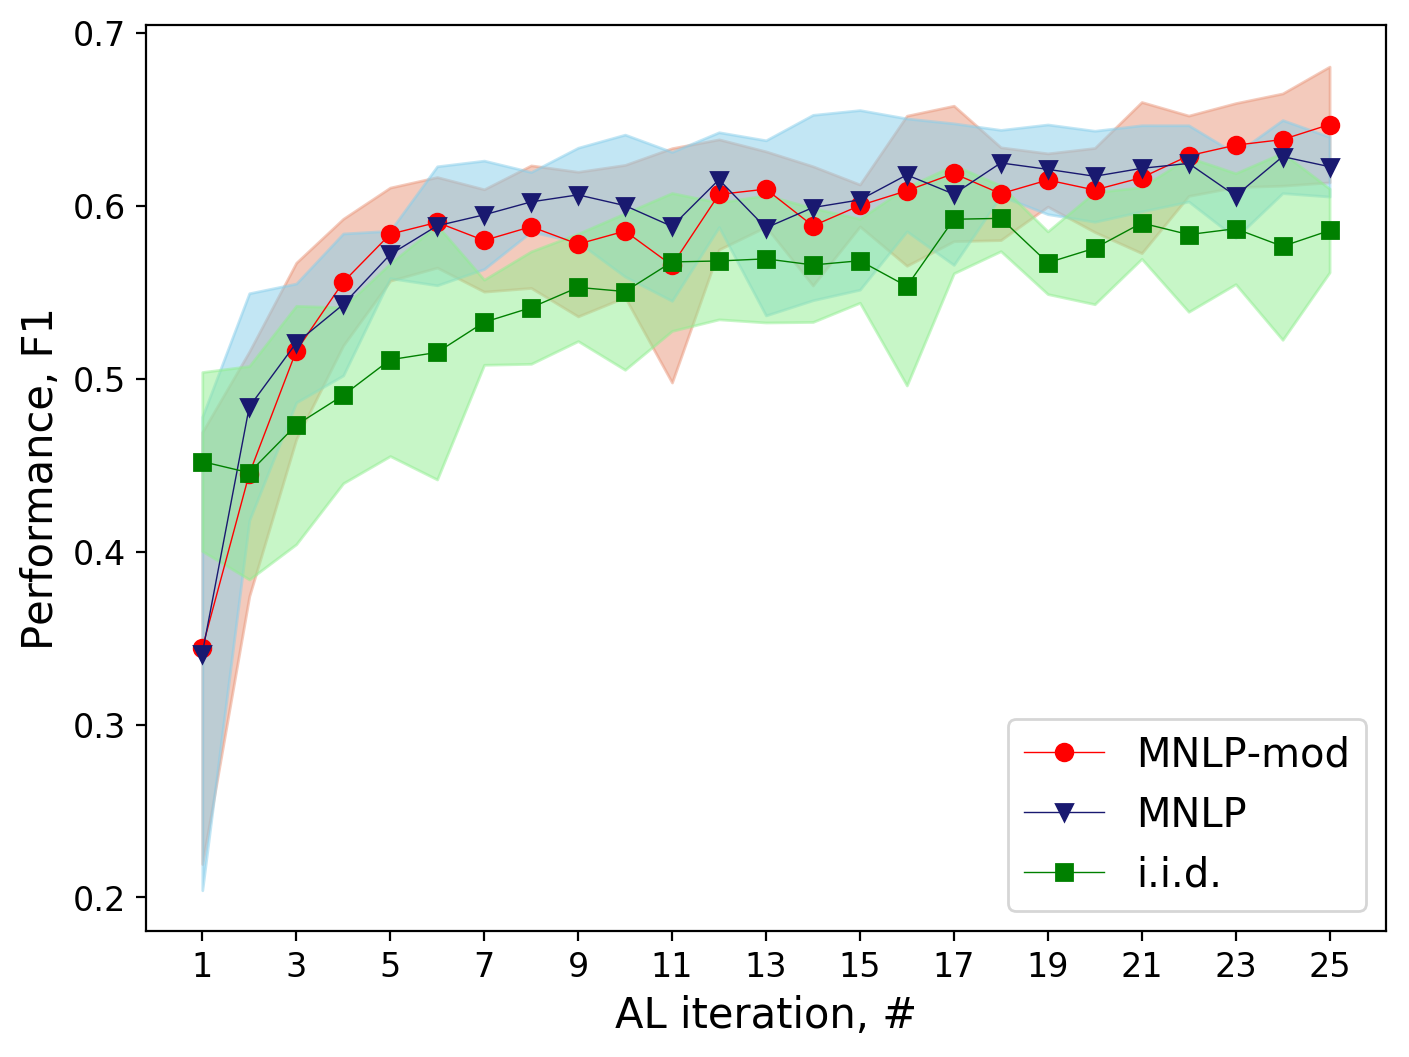

In [127]:
from generate_chart import create_chart
create_chart('../workdir/experiments/11_biobert/', 'hypertension', save_dir='../workdir/charts/bert')

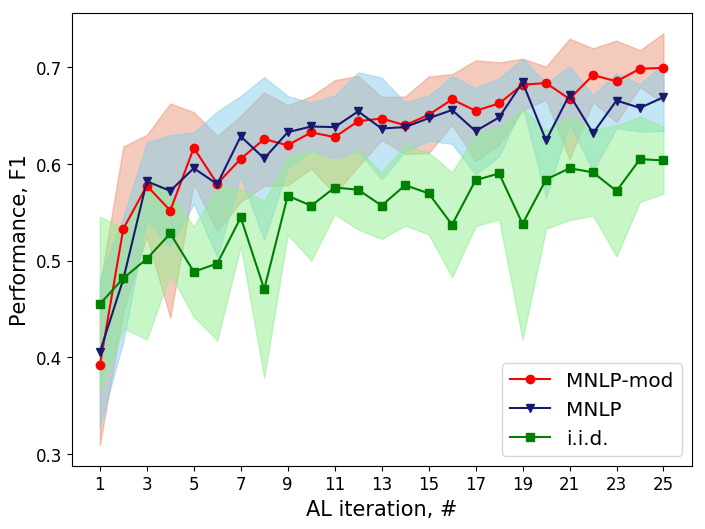

In [53]:
from generate_chart import create_chart
create_chart('../workdir/experiments/11_biobert/', 'diabetes', save_dir='../workdir/charts')

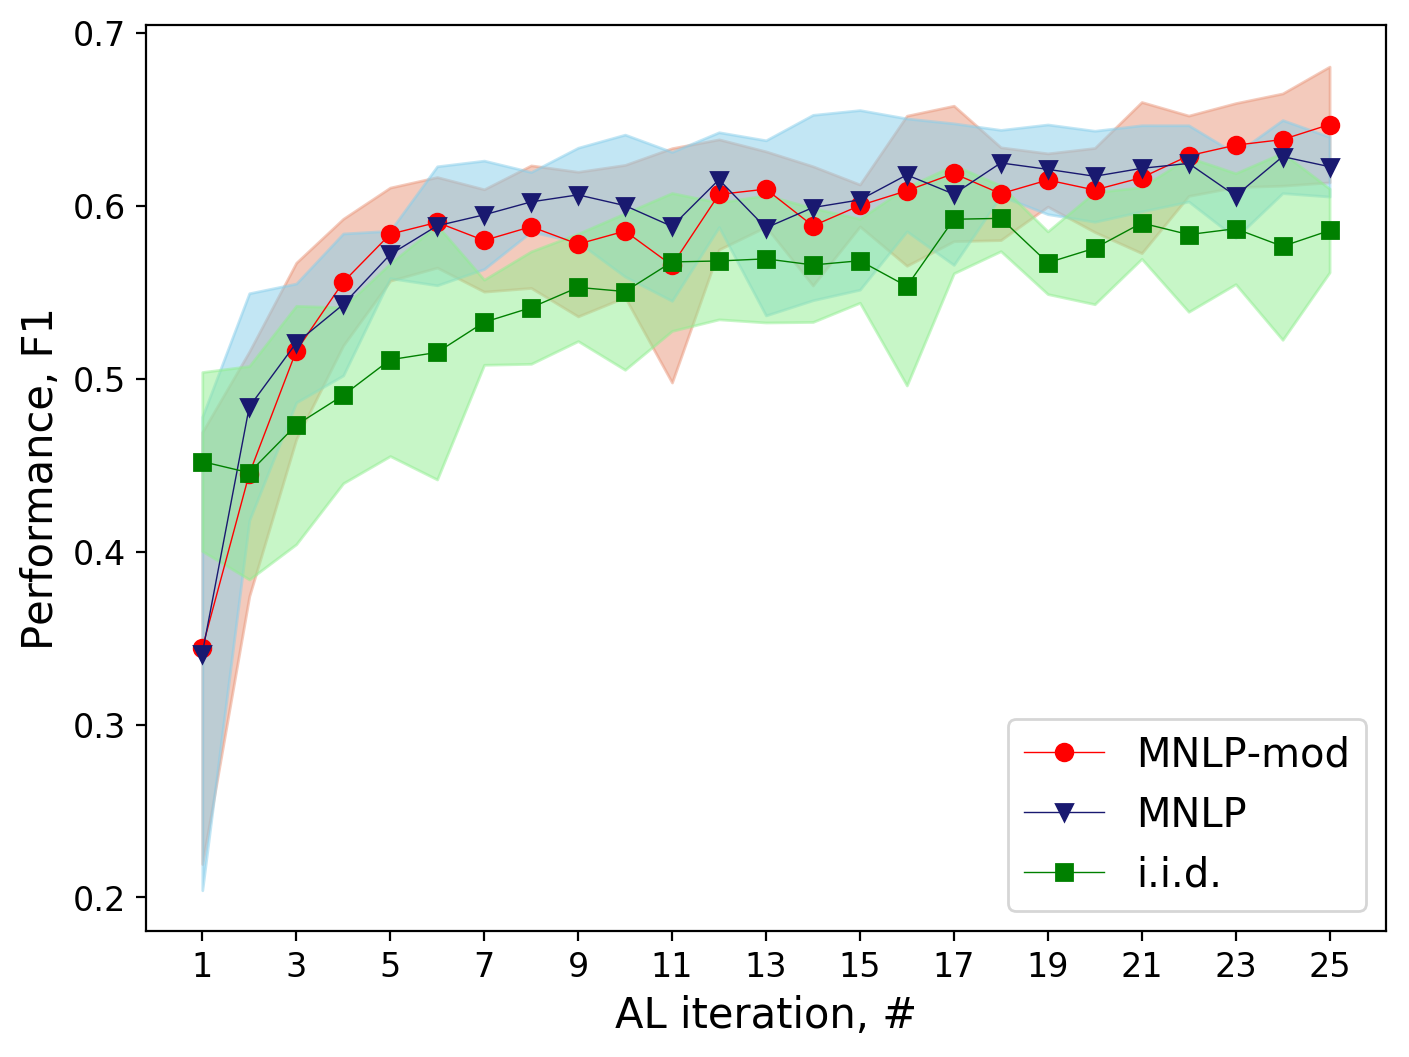

In [132]:
from generate_chart import create_chart
create_chart('../workdir/experiments/11_biobert/', 'hypertension', save_dir='../workdir/charts/bert/')

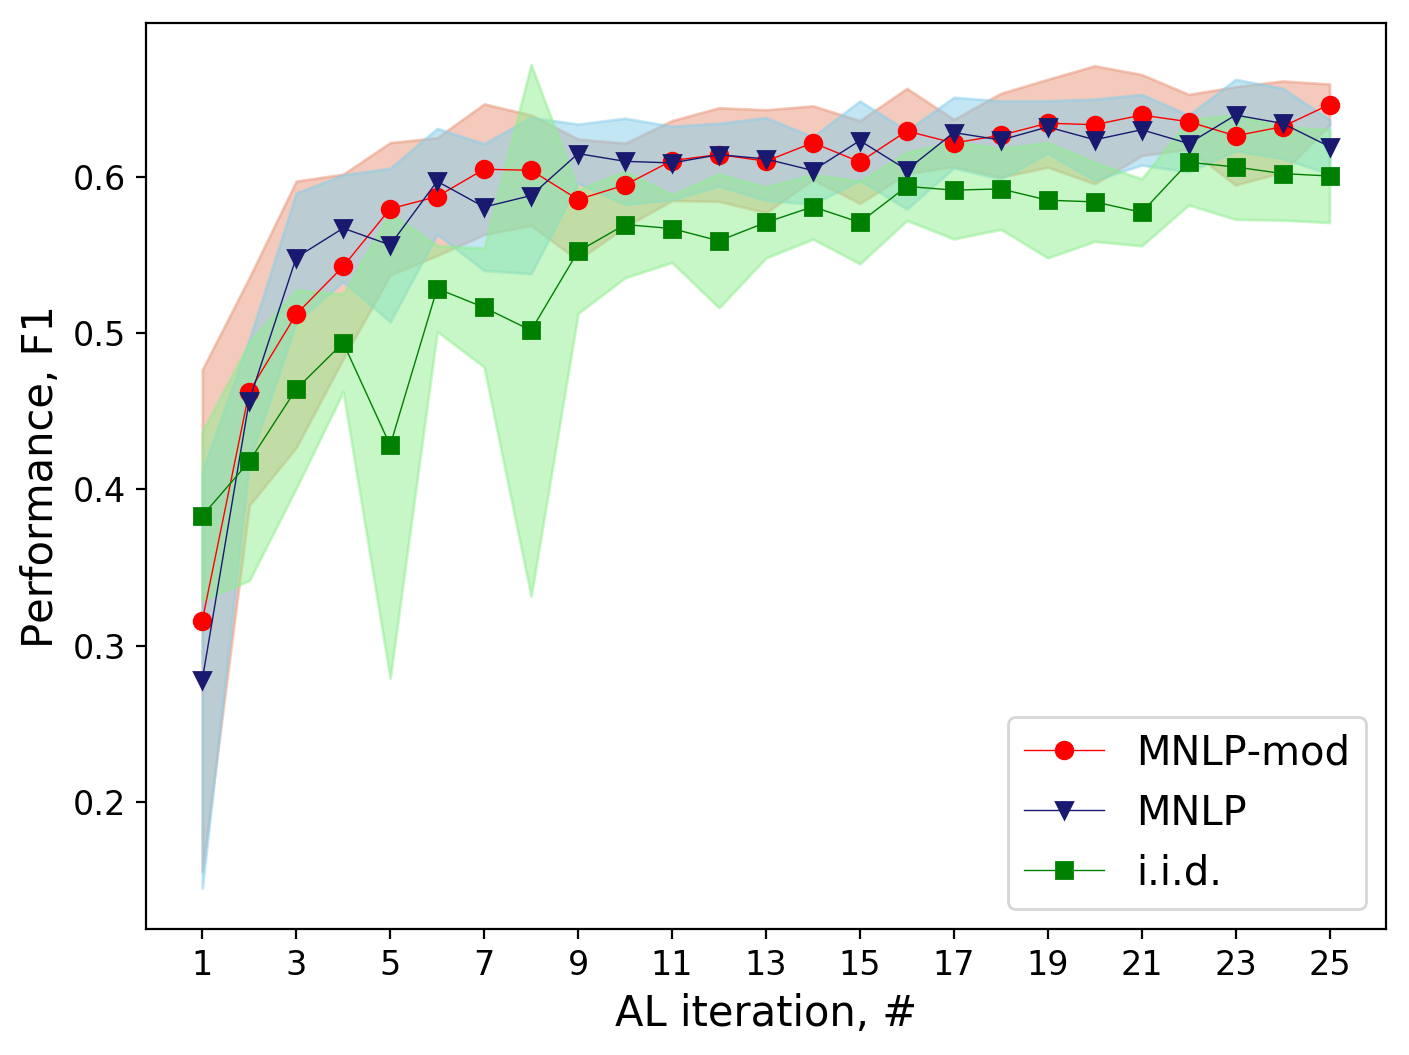

In [130]:
from generate_chart import create_chart
create_chart('../workdir/experiments/12_biobert/', 'hypertension', save_dir='../workdir/charts/bert')

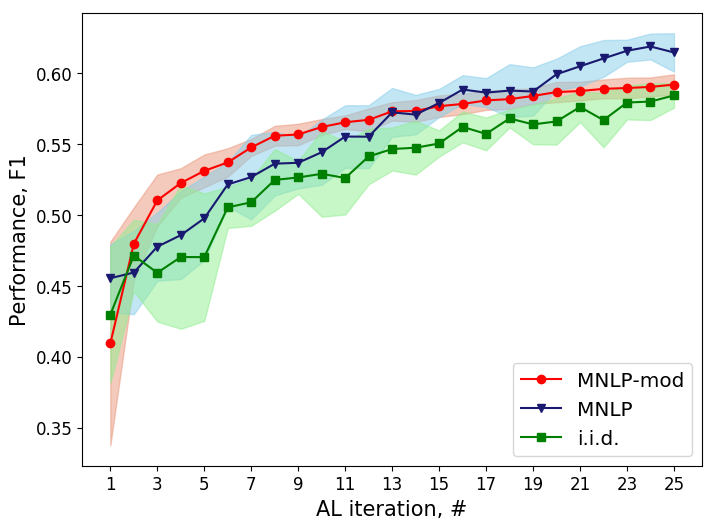

In [38]:
from generate_chart import create_chart
create_chart('../workdir/experiments/11_biobert/biocreative', 'biocreative', save_dir='../workdir/charts')

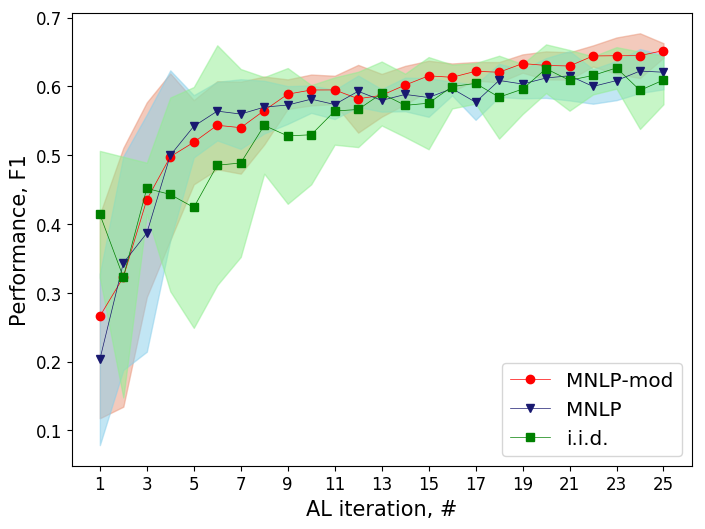

In [100]:
from generate_chart import create_chart
create_chart('../workdir/experiments/14_biobert/', 'hypertension', save_dir='../workdir/')

# Vadim

In [47]:
import os
import json
import numpy as np

vadim_dir = '/notebook/projects/biomed_ie/workdir/results/stats'
output_dir = '/notebook/projects/biomed_ie/workdir/results/final'

strat_map = {'positivelesscertain' : 'MNLP-mod',
             'random' : 'i.i.d.',
             'uncertainty' : 'MNLP'}

for attr in os.listdir(os.path.join(vadim_dir)):
    attr_dir_path = os.path.join(vadim_dir, attr)
    output_dir_attr = os.path.join(output_dir, attr)
    if not os.path.exists(output_dir_attr):
        os.mkdir(output_dir_attr)
    
    for emb_type in os.listdir(attr_dir_path):
        emb_dir_path = os.path.join(attr_dir_path, emb_type)
        
        for strat in os.listdir(emb_dir_path):
            strat_dir = os.path.join(emb_dir_path, strat)
            
            strat_stats = []
            for filename in os.listdir(strat_dir):
                with open(os.path.join(strat_dir, filename), 'r') as f:
                    strat_stats.append(np.array([e['f1_score'] for e in json.load(f)]).reshape(1, -1))
            strat_stats = np.concatenate(strat_stats, axis=0)
        
            output_file_path = os.path.join(output_dir_attr, f'{attr.lower()}_{emb_type}+{strat_map[strat]}.npy')
            print(output_file_path)
            np.save(output_file_path, strat_stats)

/notebook/projects/biomed_ie/workdir/results/final/CAD/cad_fasttext+MNLP.npy
/notebook/projects/biomed_ie/workdir/results/final/CAD/cad_fasttext+MNLP-mod.npy
/notebook/projects/biomed_ie/workdir/results/final/CAD/cad_fasttext+i.i.d..npy
/notebook/projects/biomed_ie/workdir/results/final/CAD/cad_elmo-pubmed+MNLP.npy
/notebook/projects/biomed_ie/workdir/results/final/CAD/cad_elmo-pubmed+MNLP-mod.npy
/notebook/projects/biomed_ie/workdir/results/final/CAD/cad_elmo-pubmed+i.i.d..npy
/notebook/projects/biomed_ie/workdir/results/final/HYPERTENSION/hypertension_fasttext+MNLP.npy
/notebook/projects/biomed_ie/workdir/results/final/HYPERTENSION/hypertension_fasttext+MNLP-mod.npy
/notebook/projects/biomed_ie/workdir/results/final/HYPERTENSION/hypertension_fasttext+i.i.d..npy
/notebook/projects/biomed_ie/workdir/results/final/HYPERTENSION/hypertension_elmo-pubmed+MNLP.npy
/notebook/projects/biomed_ie/workdir/results/final/HYPERTENSION/hypertension_elmo-pubmed+MNLP-mod.npy
/notebook/projects/biomed_

In [ ]:
import os
bert_path = '/notebook/projects/biomed_ie/workdir/results/bert'
for filename in os.listdir(bert_path):
    begin, end = filename.split('_')
    new_name = f'{begin}_bert-{end}'
    os.rename(os.path.join(bert_path, filename), os.path.join(bert_path, new_name))

In [34]:
import shutil

output_dir_path = '/notebook/projects/biomed_ie/workdir/results/final'
input_bert_path = '../workdir/results/bert'
for attr in os.listdir(output_dir_path):
    output_dir_path_attr = os.path.join(output_dir_path, attr)
    for bert_file in os.listdir(input_bert_path):
        if bert_file.startswith(attr.lower()):
            shutil.copy2(os.path.join(input_bert_path, bert_file), 
                         os.path.join(output_dir_path_attr, bert_file))

In [ ]:
from generate_chart import create_chart
create_chart('/notebook/projects/biomed_ie/workdir/results/final/', 'genia', save_dir='../workdir/charts/genia')

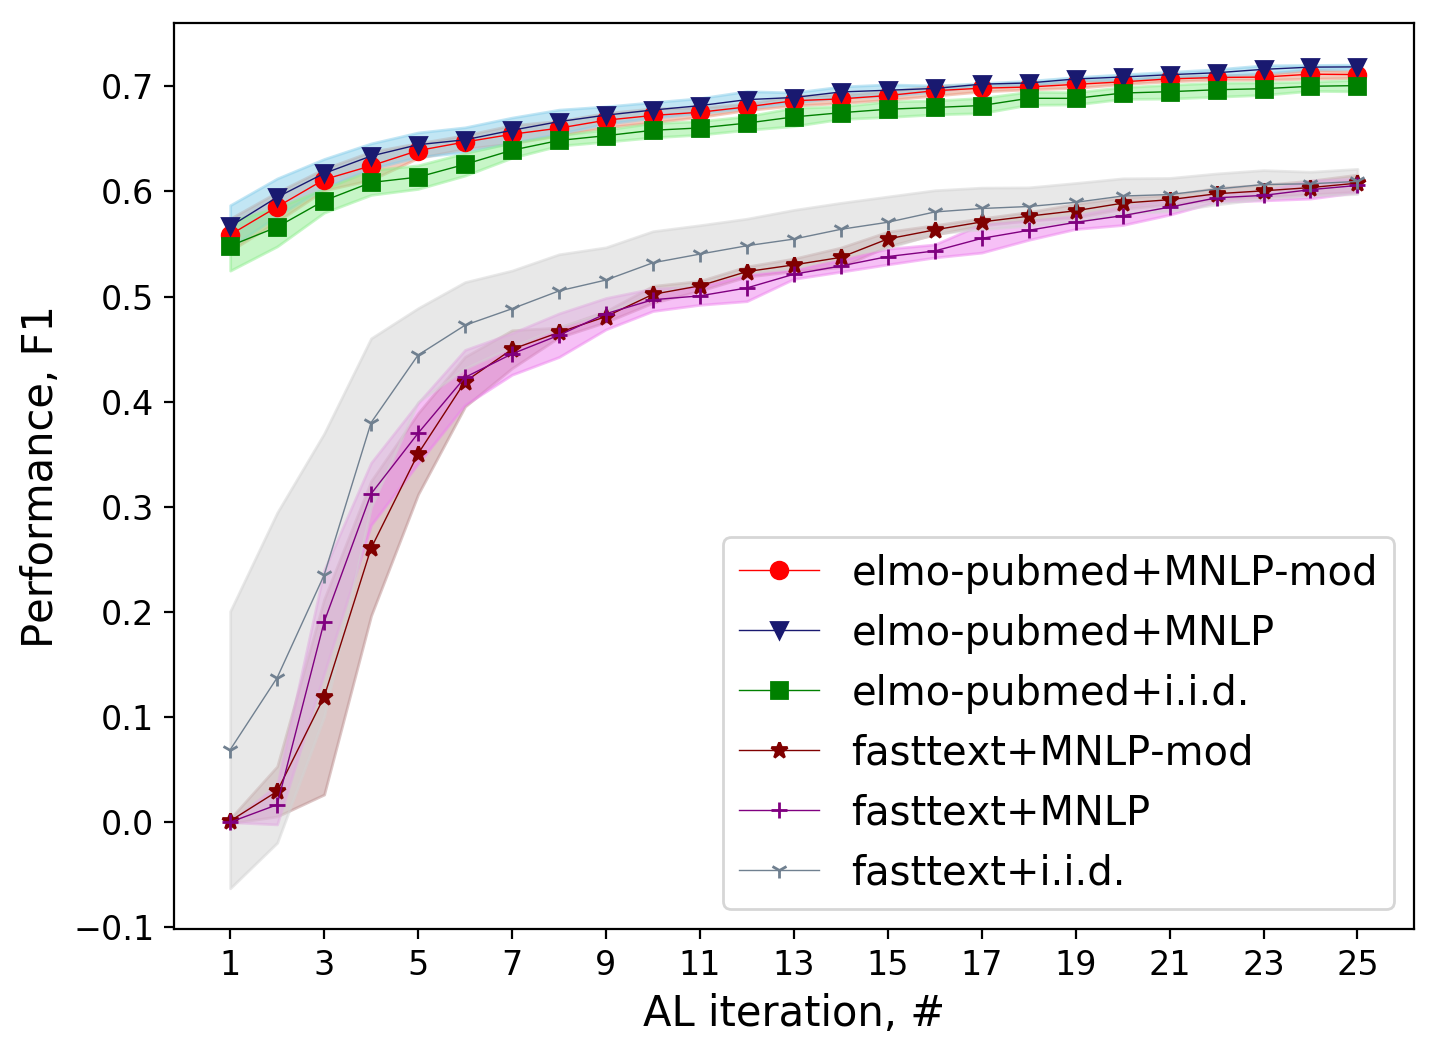

In [124]:
from generate_chart import create_chart
create_chart('/notebook/projects/biomed_ie/workdir/results/final/GENIA', 'genia', save_dir='../workdir/charts/elmo')

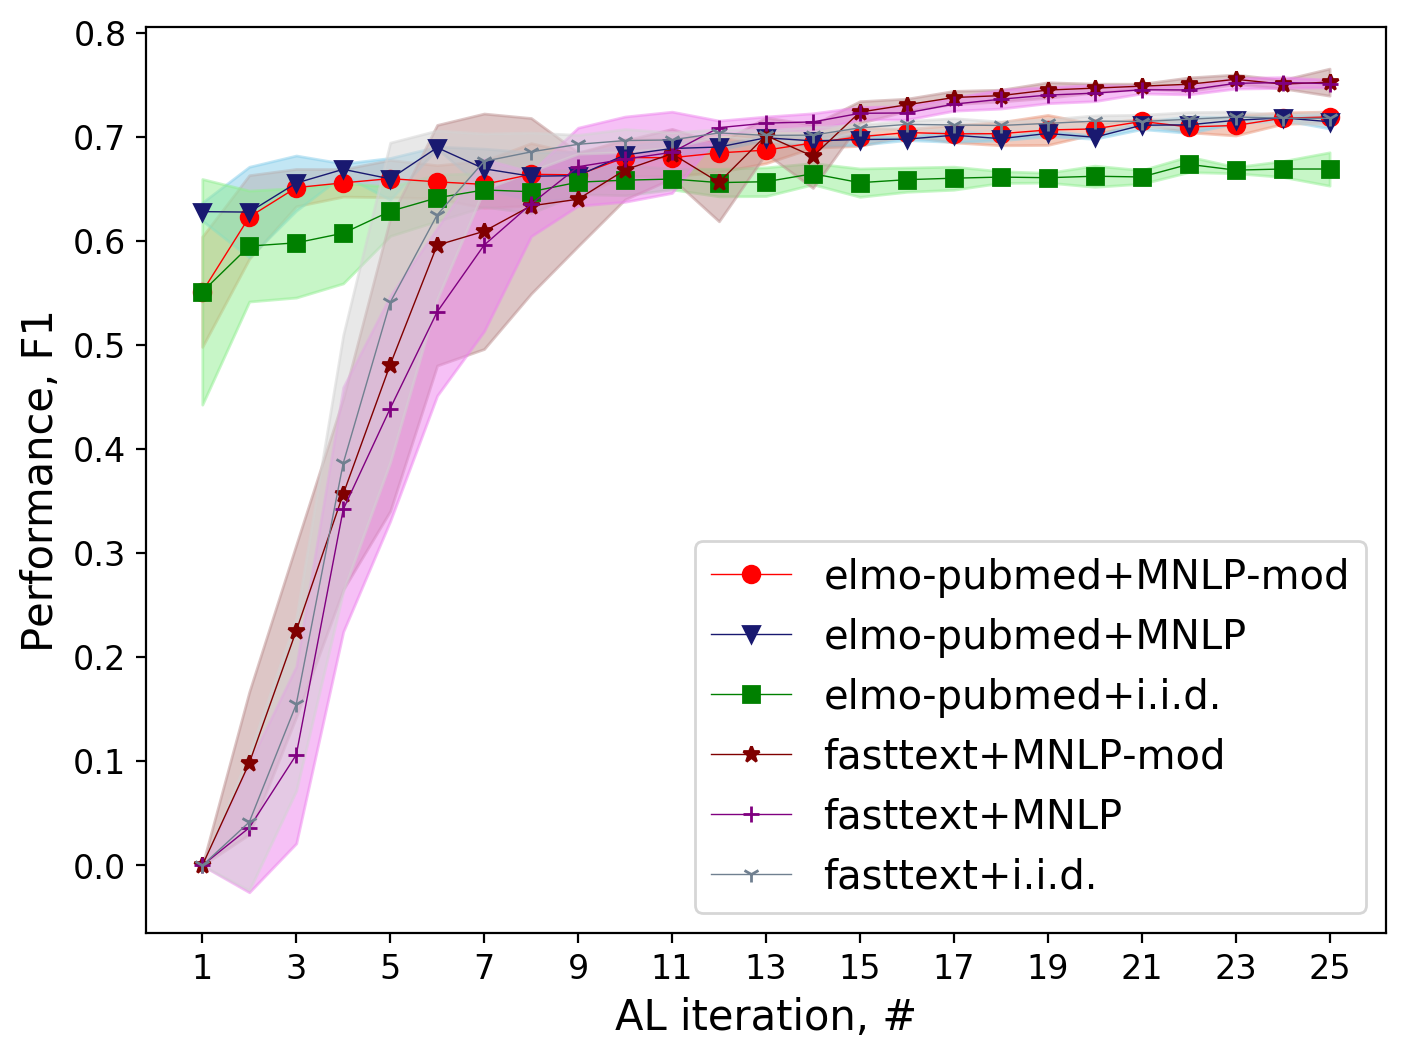

In [123]:
from generate_chart import create_chart
create_chart('/notebook/projects/biomed_ie/workdir/results/final/HYPERTENSION', 'hypertension', save_dir='../workdir/charts/elmo')

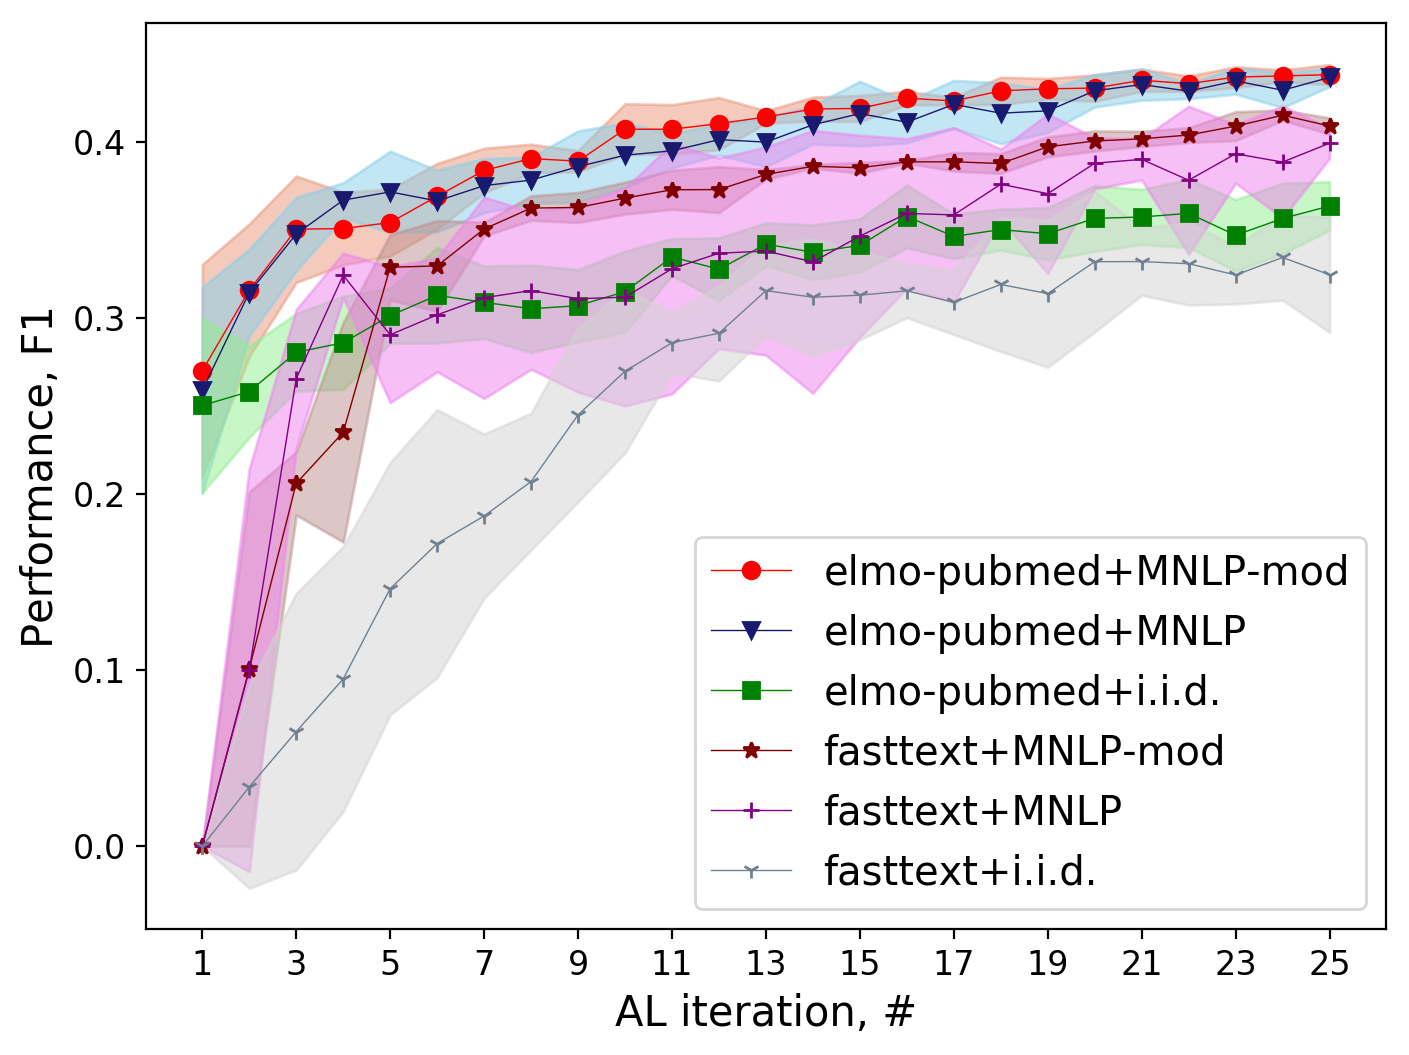

In [122]:
from generate_chart import create_chart
create_chart('/notebook/projects/biomed_ie/workdir/results/final/CAD', 'cad', save_dir='../workdir/charts/elmo')

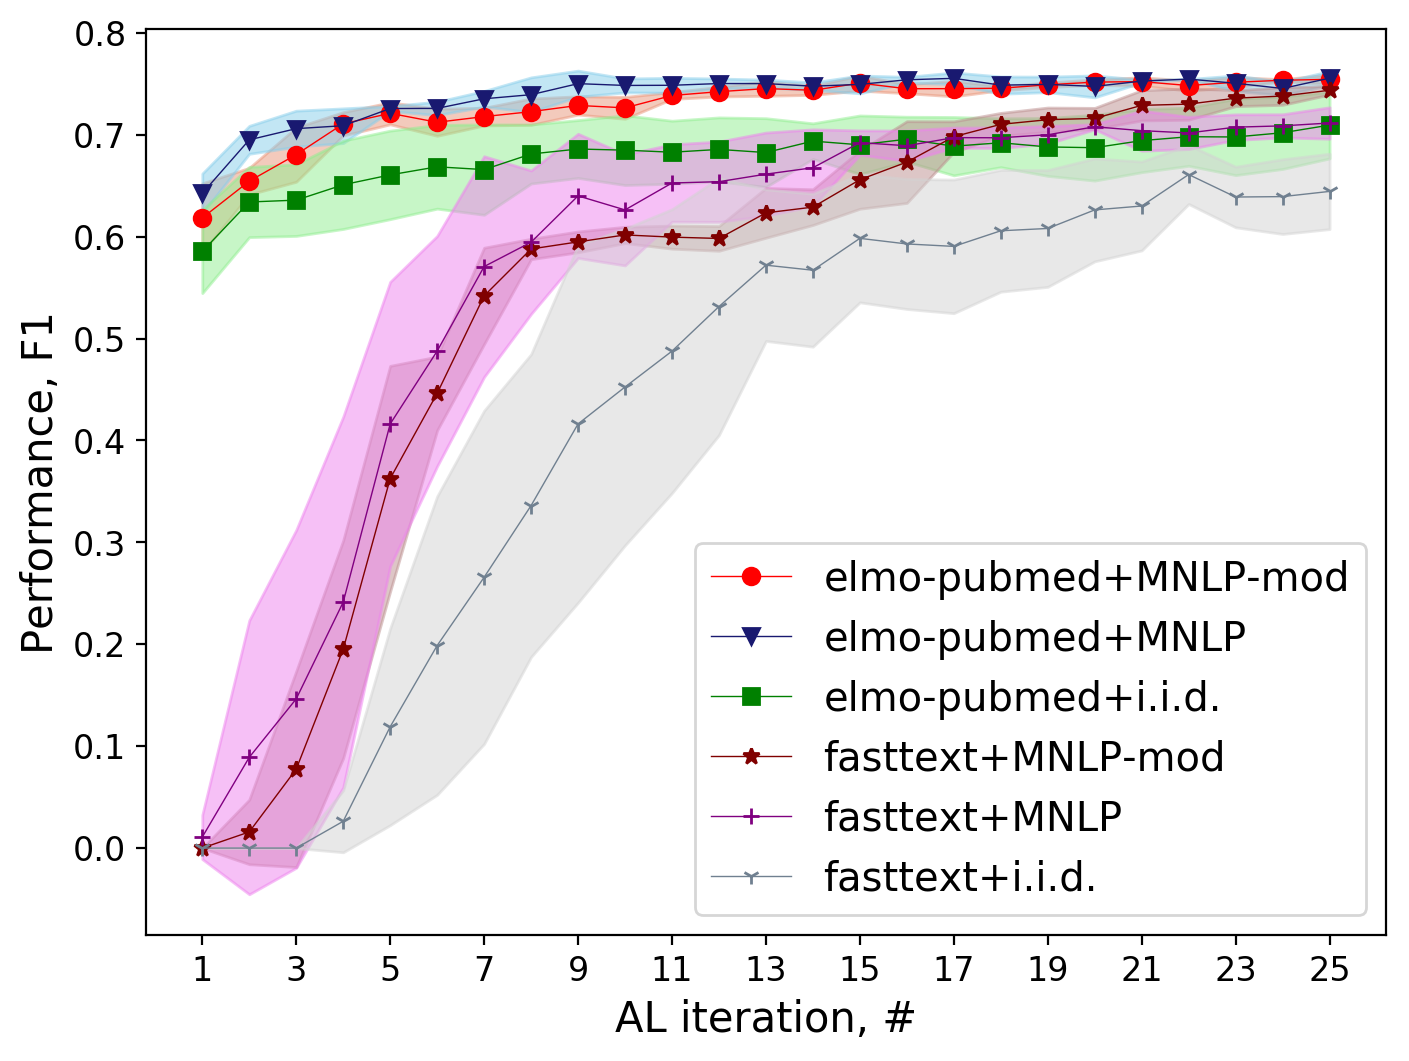

In [119]:
from generate_chart import create_chart
create_chart('/notebook/projects/biomed_ie/workdir/results/final/DIABETES', 'diabetes', save_dir='../workdir/charts/elmo')

In [ ]:
from generate_chart import create_chart
create_chart('/notebook/projects/biomed_ie/workdir/results/final/DIABETES', 'diabetes', save_dir='../workdir/charts')

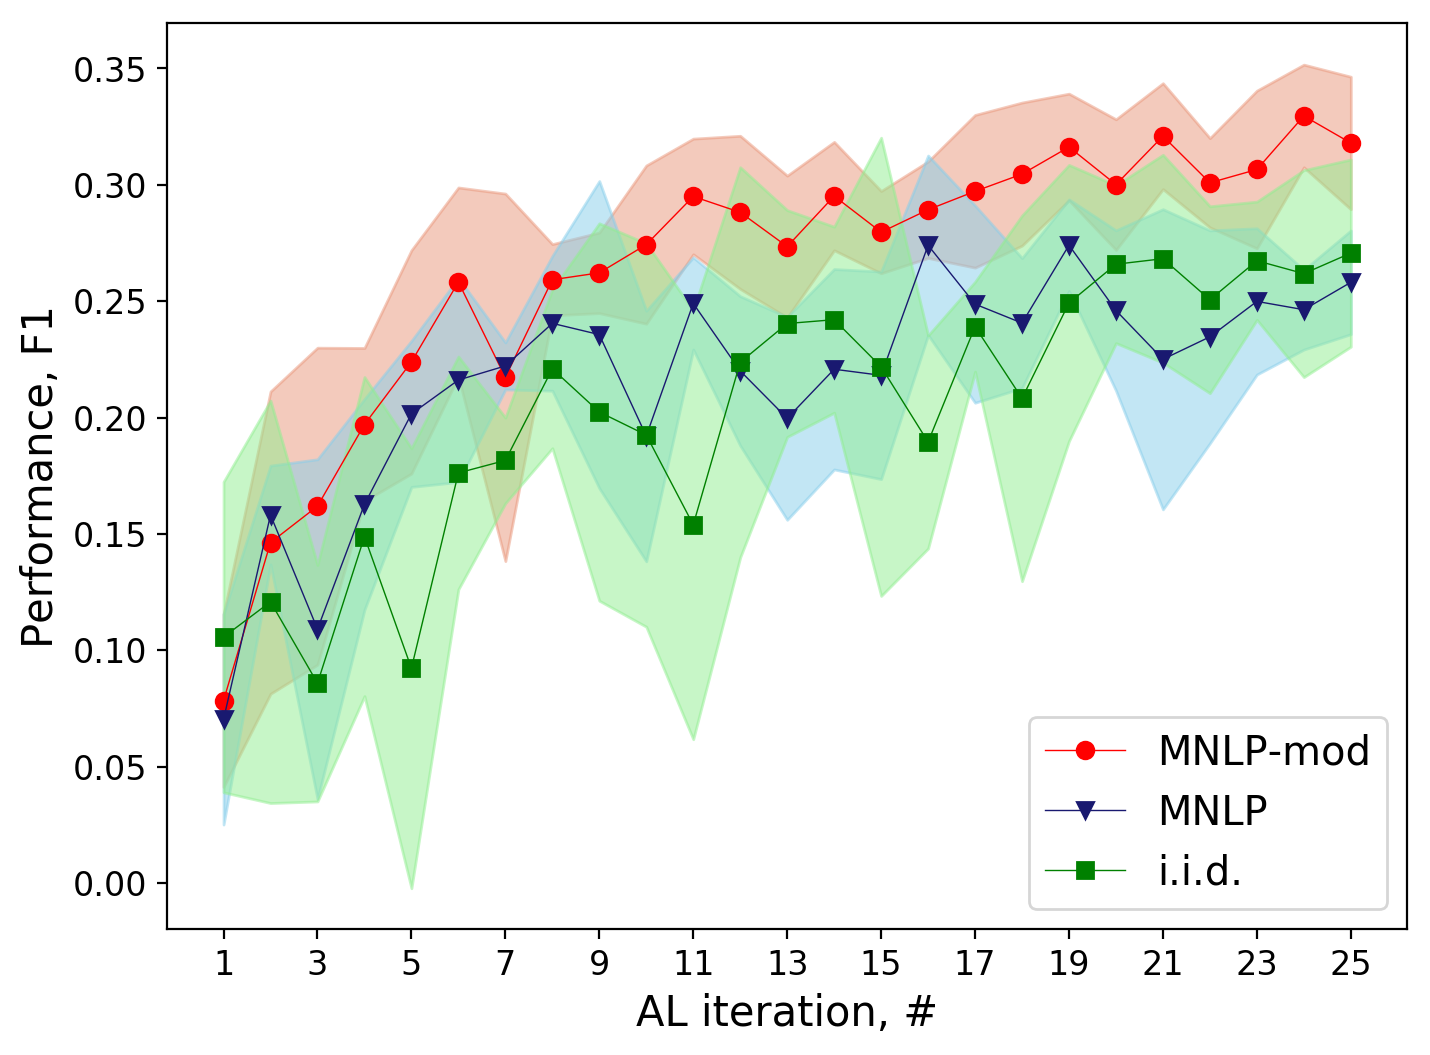

In [133]:
create_chart('../workdir/experiments/vadim', 'cad', save_dir='../workdir/charts/bert')

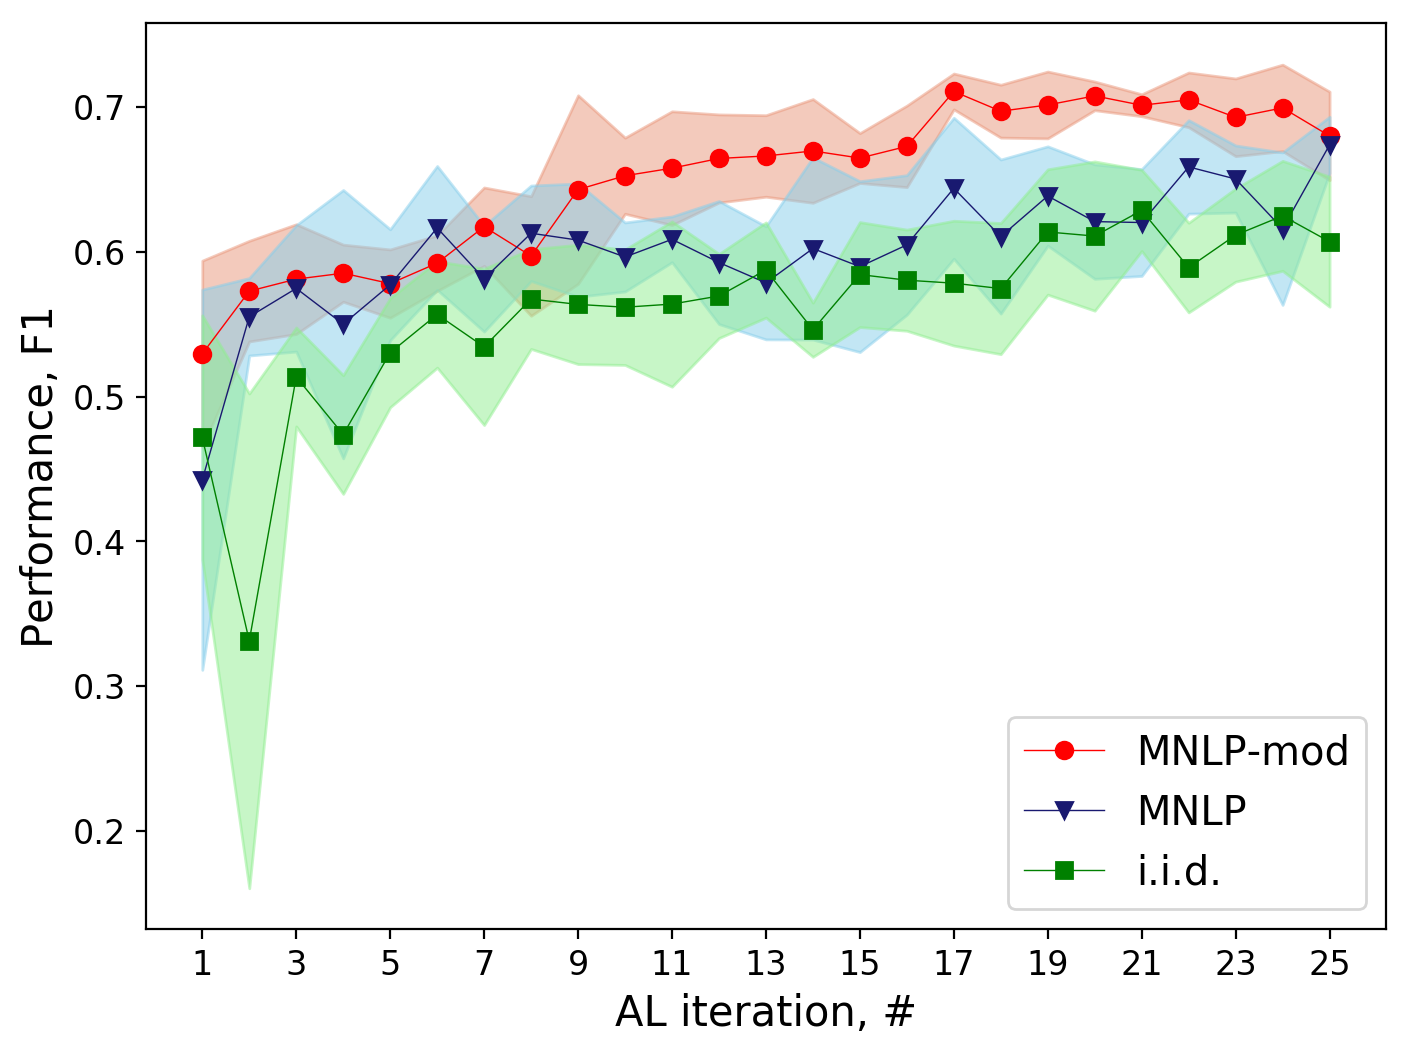

In [134]:
create_chart('../workdir/experiments/vadim', 'diabetes', save_dir='../workdir/charts/bert')

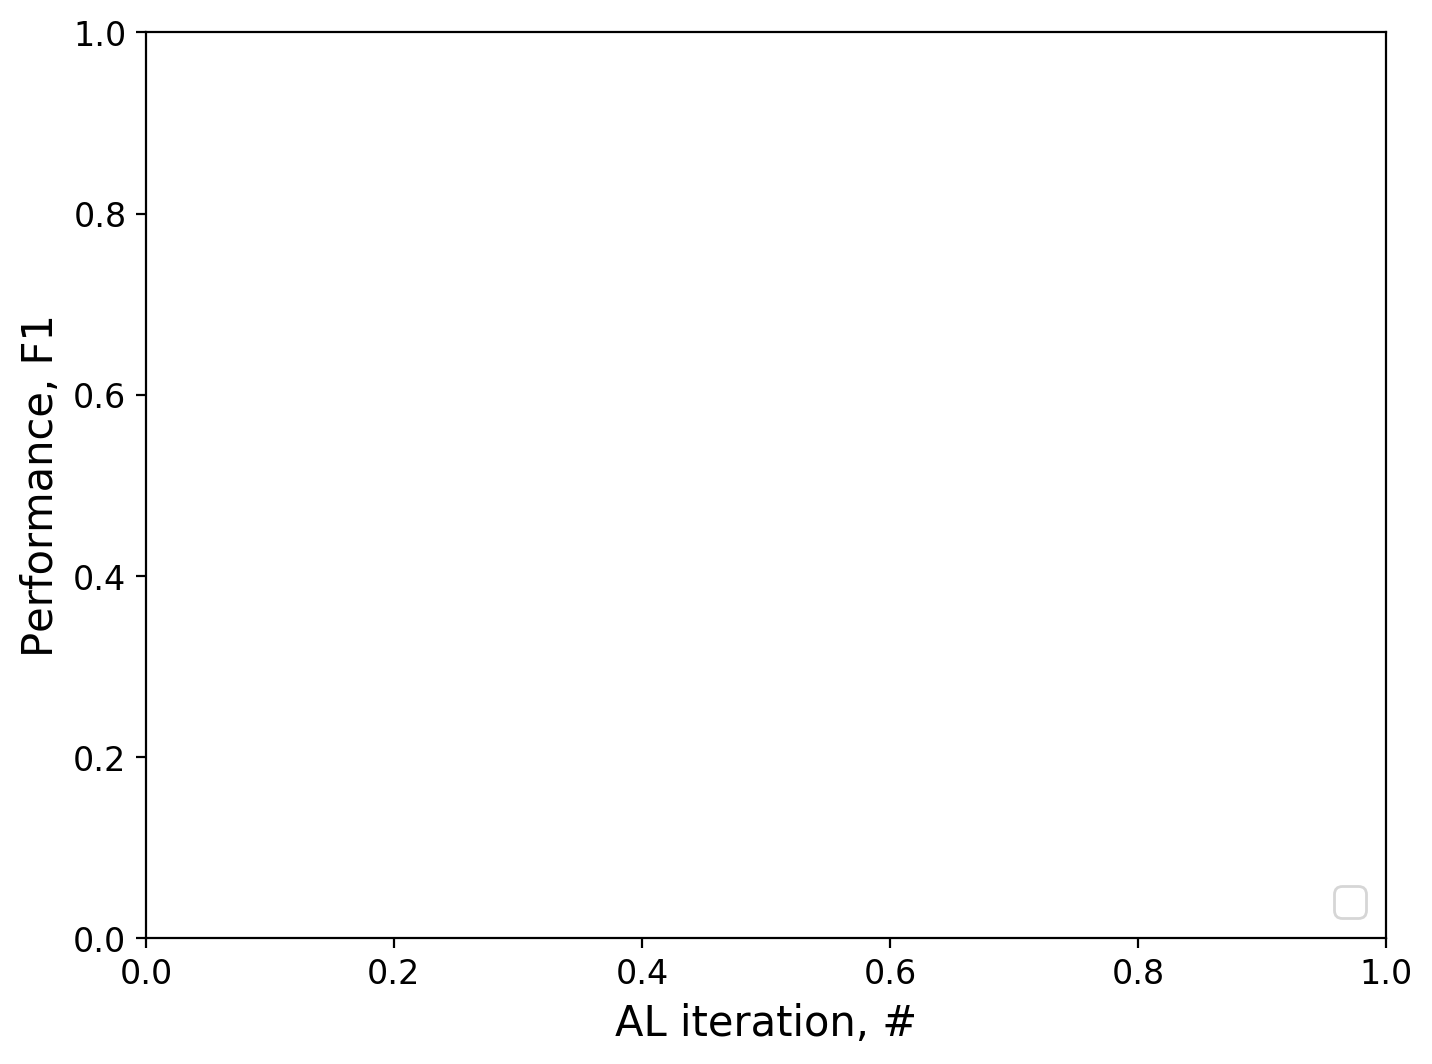

In [140]:
create_chart('../workdir/experiments/14_biobert/', 'genia', save_dir='../workdir/charts/vadim')

In [2]:
import json
import glob
import numpy as np
import os


def calculate_stat_mean_std(exp_dir_path, name):
    stats = []
    for filename in glob.glob(os.path.join(exp_dir_path, name) + '/*.json'):
        with open(filename) as f:
            stats.append(json.load(f)[1])

    print(stats)
    ROUND_SIGNS = 1
    stats = np.array(stats)
    mean_stat = round(100. * stats.mean(), ROUND_SIGNS)
    std_stat = round(100. * stats.std(), ROUND_SIGNS)
    print(stats.shape[0])
    print(f'Entity F1-score: {mean_stat} ± {std_stat}')

In [ ]:
name = 'uncertainty'
exp_dir_path = '../workdir/flair/results_1/hypertension/'
calculate_stat_mean_std(exp_dir_path, name)

In [108]:
name = 'hypertension'
exp_dir_path = '../workdir/results/full_corpus_1/'
calculate_stat_mean_std(exp_dir_path, name)

[0.7332155477031803, 0.7226817588158468, 0.7082053532250986, 0.7439898776887388, 0.743437764606266]
5
Entity F1-score: 73.03 ± 1.35


In [109]:
name = 'cad'
exp_dir_path = '../workdir/results/full_corpus_1/'
calculate_stat_mean_std(exp_dir_path, name)

[0.3945243945243945, 0.41202090592334495, 0.4285714285714286, 0.42546461051799134, 0.4253275109170305]
5
Entity F1-score: 41.72 ± 1.27


In [111]:
name = 'diabetes'
exp_dir_path = '../workdir/results/full_corpus_1/'
calculate_stat_mean_std(exp_dir_path, name)

[0.7310966449674512, 0.7022391615054789, 0.7421834956432599, 0.7112244897959182, 0.73403720462544]
5
Entity F1-score: 72.42 ± 1.5


In [112]:
name = 'genia'
exp_dir_path = '../workdir/results/full_corpus_1/'
calculate_stat_mean_std(exp_dir_path, name)

[0.730664931120512, 0.7279991243432575, 0.7323308270676693, 0.7241860964865156, 0.7346605744125327]
5
Entity F1-score: 73.0 ± 0.36


In [133]:
name = 'cad'
exp_dir_path = '../workdir/results/full_corpus_bert/'
calculate_stat_mean_std(exp_dir_path, name)

[0.4390862944162437, 0.3831615120274915, 0.42263180454350624, 0.41883519206939285, 0.4218682737839001]
5
Entity F1-score: 41.71 ± 1.84


In [139]:
name = 'hypertension'
exp_dir_path = '../workdir/results/full_corpus_bert/'
calculate_stat_mean_std(exp_dir_path, name)

[0.7204391891891894, 0.7265135699373696, 0.7248094834885691, 0.7095959595959594, 0.7344290657439446]
5
Entity F1-score: 72.32 ± 0.82


In [140]:
name = 'diabetes'
exp_dir_path = '../workdir/results/full_corpus_bert/'
calculate_stat_mean_std(exp_dir_path, name)

[0.7303921568627451, 0.7488491048593351, 0.7556701030927835, 0.7316836487142164, 0.7530407191961925]
5
Entity F1-score: 74.39 ± 1.08


In [147]:
name = 'genia'
exp_dir_path = '../workdir/results/full_corpus_bert/'
calculate_stat_mean_std(exp_dir_path, name)

[0.7282596895016828, 0.7311559154393784, 0.7287239779959013, 0.7258309797957853, 0.7361503367369107]
5
Entity F1-score: 73.0 ± 0.35


In [156]:
name = 'hypertension'
exp_dir_path = '../workdir/results/full_corpus_bert_2/'
calculate_stat_mean_std(exp_dir_path, name)

[0.7331081081081081, 0.7280405405405405, 0.7265948632974317, 0.7434154630416313, 0.7327249022164276]
5
Entity F1-score: 73.3 ± 0.6


In [155]:
name = 'diabetes'
exp_dir_path = '../workdir/results/full_corpus_bert_2/'
calculate_stat_mean_std(exp_dir_path, name)

[0.7191245440333507, 0.7260069617105916, 0.725111441307578, 0.7372793354101765, 0.7462082912032356]
5
Entity F1-score: 73.1 ± 1.0


In [154]:
name = 'genia'
exp_dir_path = '../workdir/results/full_corpus_bert_2/'
calculate_stat_mean_std(exp_dir_path, name)

[0.7335695876288659, 0.7382789317507418, 0.7351054078826764, 0.7370180641682395, 0.7328120787274197]
5
Entity F1-score: 73.5 ± 0.2


In [153]:
name = 'cad'
exp_dir_path = '../workdir/results/full_corpus_bert_2/'
calculate_stat_mean_std(exp_dir_path, name)

[0.4286282306163022, 0.4210970464135021, 0.4266994266994267, 0.42070933550754175, 0.4279835390946502]
5
Entity F1-score: 42.5 ± 0.3


In [150]:
def calculate_stat_mean_std_flair(exp_dir_path, name, emb):
    final_path = os.path.join(exp_dir_path, name, emb)
    if not os.path.exists(final_path):
        print('empty')
        return
    
    stats = []
    for fname in os.listdir(final_path):
        stat_path = os.path.join(final_path, fname, 'entity_f1.txt')
        if not os.path.exists(stat_path):
            continue
            
        with open(stat_path) as f:
            stats.append(float(f.read()))
    
    print(stats)
    ROUND_SIGNS = 1
    PM_SIGN = '$\pm$'
    #PM_SIGN = '±'
    stats = np.array(stats)
    mean_stat = round(100. * stats.mean(), ROUND_SIGNS)
    std_stat = round(100. * stats.std(), ROUND_SIGNS)
    print(stats.shape[0])
    print(f'Entity F1-score: {mean_stat} {PM_SIGN} {std_stat}')
    

In [114]:
exp_dir_path = '../workdir/results/full_corpus_flair/'
name = 'diabetes'
#emb = 'fasttext'
emb = 'elmo-pubmed'
calculate_stat_mean_std_flair(exp_dir_path, name, emb)

[0.7728407388916624]
1
Entity F1-score: 77.28 ± 0.0


In [151]:
exp_dir_path = '../workdir/results/full_corpus_flair/'
for corpus in ['hypertension', 'diabetes', 'cad', 'genia']:
    for emb in ['fasttext', 'elmo-pubmed']:
        print('=========')
        print(f'Corpus: {corpus}')
        print(f'Emb: {emb}')
        calculate_stat_mean_std_flair(exp_dir_path, corpus, emb)

Corpus: hypertension
Emb: fasttext
[0.7221223021582734, 0.7238010657193606, 0.7311361665221161, 0.7302977232924693, 0.7290379523389232]
5
Entity F1-score: 72.7 $\pm$ 0.4
Corpus: hypertension
Emb: elmo-pubmed
[0.7351164797238999, 0.7296173044925124, 0.7369747899159663, 0.7444444444444446]
4
Entity F1-score: 73.7 $\pm$ 0.5
Corpus: diabetes
Emb: fasttext
[0.726215644820296, 0.7435762978500263, 0.7542679772374548, 0.7549325025960539, 0.7418677859391396]
5
Entity F1-score: 74.4 $\pm$ 1.0
Corpus: diabetes
Emb: elmo-pubmed
[0.7735191637630662, 0.7714427367377293, 0.7728407388916624, 0.782, 0.7763881940970486]
5
Entity F1-score: 77.5 $\pm$ 0.4
Corpus: cad
Emb: fasttext
[0.3655673560648407, 0.3633276740237691, 0.3641456582633053, 0.36507042253521127, 0.37643207855973815]
5
Entity F1-score: 36.7 $\pm$ 0.5
Corpus: cad
Emb: elmo-pubmed
[0.4510272336359293, 0.4520813165537271, 0.4416315049226442, 0.45506149479659413, 0.4447605500237079, 0.46028708133971297]
6
Entity F1-score: 45.1 $\pm$ 0.6
Corpus:

In [9]:
# Flair active learning

import glob
import numpy as np
import os
import json

prefix = 'hypertension'
exp_path = '../workdir/flair/results_3/hypertension/elmo-kutuzov/random'
output_dir = os.path.join(os.path.dirname(exp_path), 'all_stats')
final_array = []
for file_path in glob.glob(exp_path + '/statistics*.json'):
    with open(file_path) as f:
        stat = json.load(f)
        
    stat_array = np.array([[e['f1_score'] for e in stat]])
    final_array.append(stat_array)
    

final_array = np.concatenate(final_array, axis=0)
np.save(os.path.join(output_dir, 'hypertension_' + os.path.basename(exp_path) + '.npy'), final_array)

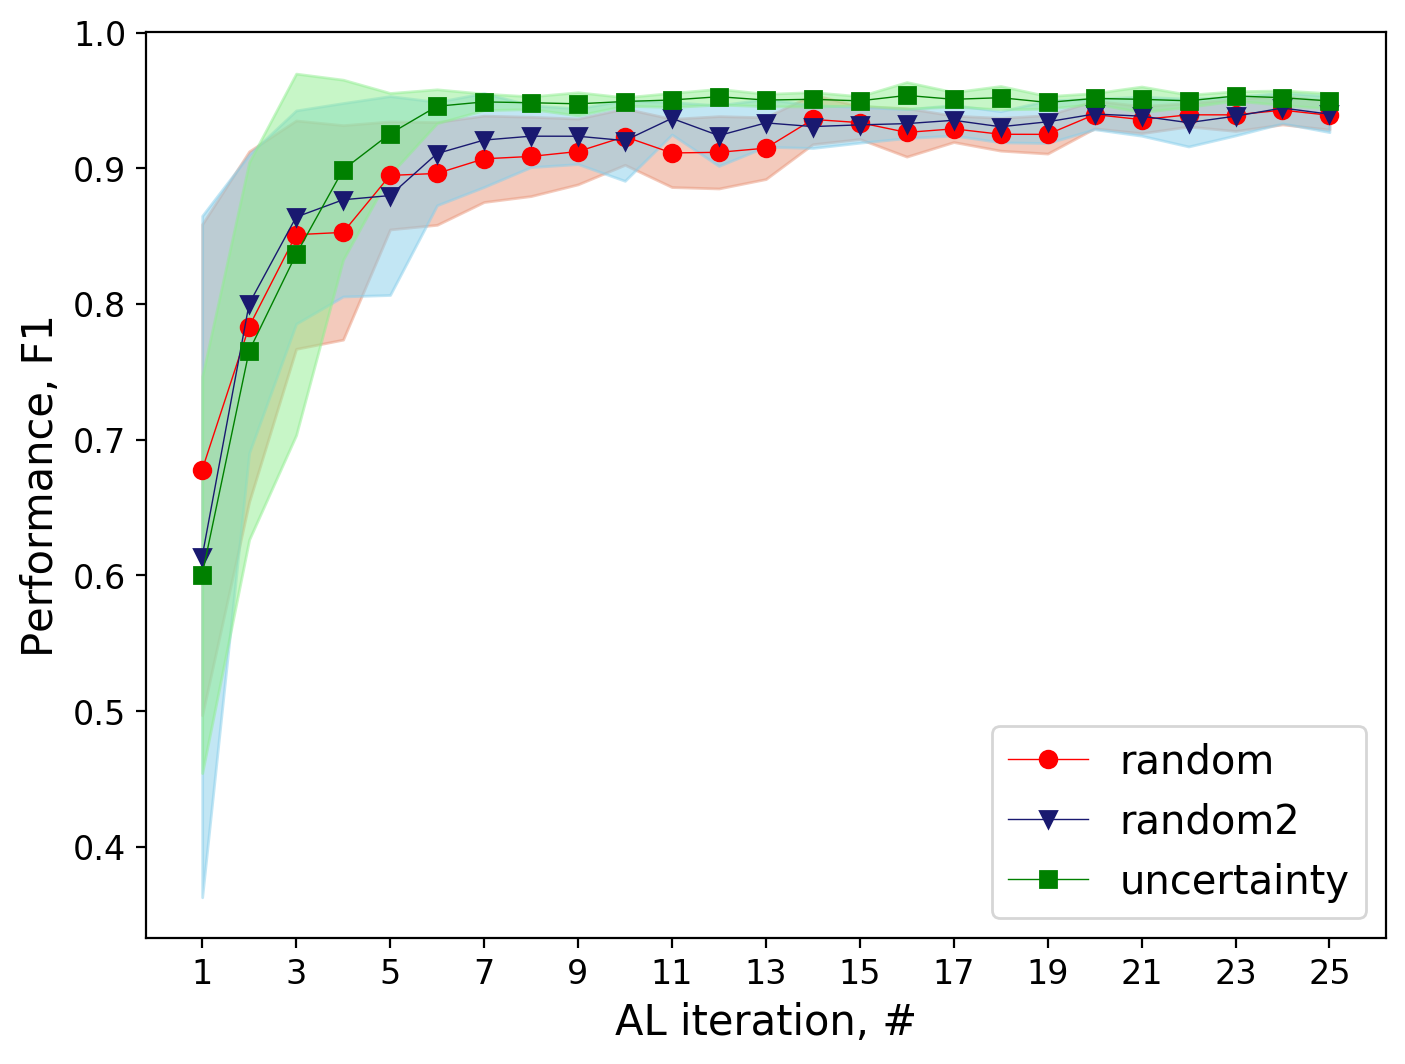

In [12]:
from generate_chart import create_chart
%matplotlib inline

create_chart('../workdir/flair/results_1/hypertension/elmo-kutuzov/all_stats', 'hypertension', save_dir='../workdir/charts')